In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import odeint
from scipy.stats import gamma, fit

Anna Garbo 2091751
# Exercise 1

## 1
Linear stability analysis of the deterministic logistic equation.

In [2]:
# Define the variables and parameters
N, r, K = sp.symbols('N r K')

# Define the logistic equation
dN_dt = r * N * (1 - N / K)

# Find equilibrium points by setting dN/dt to zero
equilibrium_points = sp.solve(dN_dt, N)

# Linearize the equation around equilibrium points
linearized_equations = []
for eq_point in equilibrium_points:
    # Take the derivative of dN_dt with respect to N and evaluate at the equilibrium point
    linearized_eq = dN_dt.diff(N).subs(N, eq_point)
    linearized_equations.append((eq_point, linearized_eq))

# Interpret stability
for eq_point, linearized_eq in linearized_equations:
    stability = "Stable" if linearized_eq.subs({r: 1, K: 1}) < 0 else "Unstable"
    
    print(f"Equilibrium point N = {eq_point}: {stability}")


Equilibrium point N = 0: Unstable
Equilibrium point N = K: Stable


## 2
The quasi stationary approximation of the consumer resource model with 1 species and 1 resources for the abiotic case. The analytical result estimated with simulations. I choose to implement also Eulero numerical methods to see if the result was the same and the hypothesis has been confirmed.

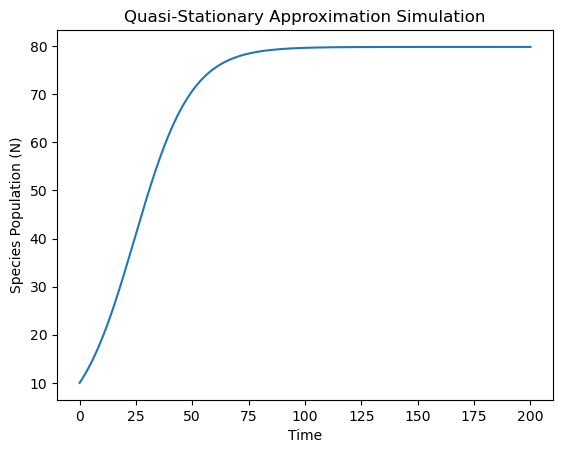

In [3]:
# Parameters
r = 0.1
K = 100
c = 0.02
a = 10
d = 0.05
b = 0.5

# Equilibrium resource concentration
R_star = (b * K) / (d - r)

# Define the simplified equation for dN/dt
def simplified_model(N, t):
    dNdt = r * N * (1 - N / K) - (c * N * R_star) / (a + R_star)
    return dNdt

# Initial conditions
N0 = 10

# Time points
t1 = np.linspace(0, 200, 1000)

# Solve the ODE

N = odeint(simplified_model, N0, t1)

# Plot the results
plt.figure()
plt.plot(t1, N)
plt.xlabel('Time')
plt.ylabel('Species Population (N)')
plt.title('Quasi-Stationary Approximation Simulation')
plt.show()


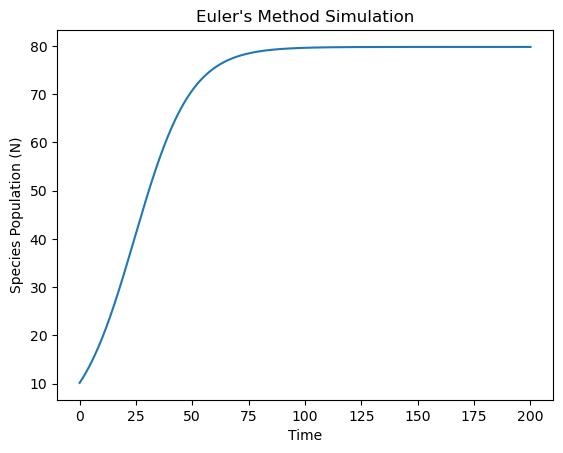

In [4]:
N_plus = N0  # Initial population
N_eu = []    # List to store population values

# Time parameters
t0 = 0          # Initial time
t_end = 200     # End time
dt = 0.2        # Time step
t = t0          # Initialize the time variable

while t <= t_end:
    # Calculate the population using Euler's method
    dNdt = simplified_model(N_plus, t)
    N_plus = N_plus + dNdt * dt

    # Append the population value to the list
    N_eu.append(N_plus)

    # Update the time variable
    t += dt

# Plot the results
plt.plot(np.arange(t0, t_end + dt, dt), N_eu)
plt.xlabel('Time')
plt.ylabel('Species Population (N)')
plt.title('Euler\'s Method Simulation')
plt.show()


In [5]:
# Time at the end of the simulation
t_final = t1[-1]

# Print and compare the results
print(f"Numerical result with Euler Method t={t_final}s: {np.round(N_eu[-1],4)}")
print(f"Numerical result with scipy integrate at t={t_final}s: {np.round(N[-1],4)}")



Numerical result with Euler Method t=200.0s: 79.7979
Numerical result with scipy integrate at t=200.0s: [79.7979]


## 3
Simultation of the stochastic logistic model and verification that the stationary solution is distributed as a Gamma (in the case of linear (environmental) multiplicative noise) or P( n ) given by Eq. 2.25 in the notes for the sub-linear (demographic) multiplicative noise.

### Case of linear (environmental) multiplicative noise

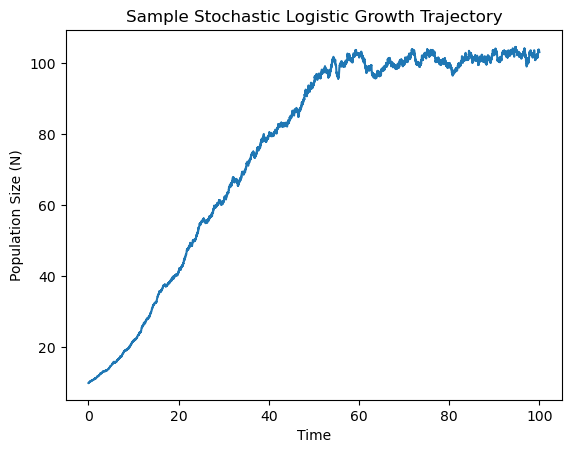

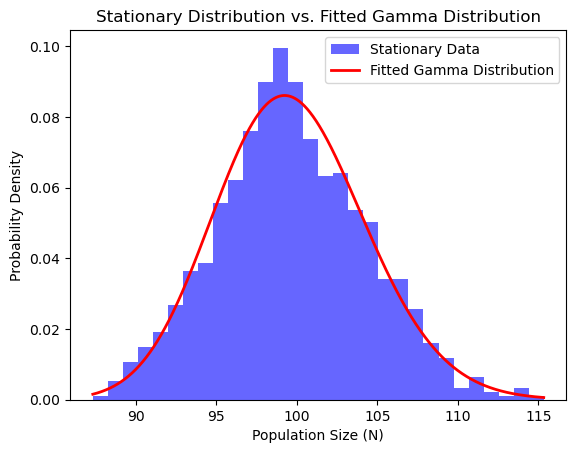

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters for the stochastic logistic model
r = 0.1
K = 100
alpha = 0.02
N0 = 10
T = 100
dt = 0.01
num_steps = int(T / dt)
num_samples = 1000  # Number of simulation samples

# Initialize arrays to store results
N_values = np.zeros((num_samples, num_steps))

# Monte Carlo simulation
for sample in range(num_samples):
    N = N0
    for i in range(num_steps):
        dW = np.random.normal(0, np.sqrt(dt))
        dN = (r * N - (r * N**2) / K) * dt + alpha * N * dW
        N += dN
        N_values[sample, i] = N

# Plot a sample trajectory
plt.plot(np.arange(0, T, dt), N_values[0, :])
plt.xlabel('Time')
plt.ylabel('Population Size (N)')
plt.title('Sample Stochastic Logistic Growth Trajectory')
plt.show()

# Fit a Gamma distribution to the stationary distribution
stationary_data = N_values[:, -1]
params = gamma.fit(stationary_data)

# Plot the histogram of the stationary data and the fitted Gamma distribution
plt.hist(stationary_data, bins=30, density=True, alpha=0.6, color='b', label='Stationary Data')
x = np.linspace(min(stationary_data), max(stationary_data), 1000)
pdf_fitted = gamma.pdf(x, *params)
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Fitted Gamma Distribution')
plt.xlabel('Population Size (N)')
plt.ylabel('Probability Density')
plt.title('Stationary Distribution vs. Fitted Gamma Distribution')
plt.legend()
plt.show()

